# Project 2

### Step 1: Load the python libraries you will need for this project 

In [161]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [162]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [163]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [164]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = Rejected 1 = Accepted | categorical
Gre | GRE Score | continuous
GPA | Grade Point Average | continuous
Prestige | rank of an applicant's undergraduate alma mater, <br /> with 1 being the highest and 4 as the lowest | categorical

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Standard Deviation for GRE is larger than GPA since the scale of GRE is much larger than GPA. Range of both features can give us an idea, range of GPA is [1,4] where as GRE is [220,400]

#### Question 4. Drop data points with missing data


In [165]:
adm_df = df_raw.dropna() 
print adm_df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: as you can see from above the count of df_raw and adm_df are different since they have been dropped

#### Question 6. Create box plots for GRE and GPA

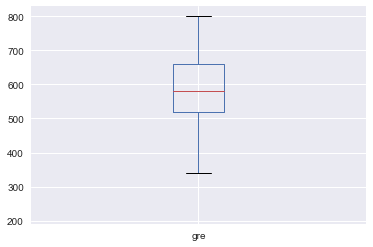

In [166]:
#boxplot 1
adm_df['gre'].plot(kind='box')

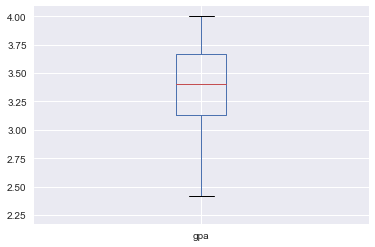

In [167]:
#boxplot 2 
adm_df['gpa'].plot(kind='box')

# Building a model 

### Create dummy variables for categorical features

In [168]:
adm_df1 = adm_df.join(pd.get_dummies(adm_df['prestige'], prefix='prestige'))
adm_df1.drop(['prestige'], axis=1)

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1
5,1,760.0,3.00,0,1,0,0
6,1,560.0,2.98,1,0,0,0
7,0,400.0,3.08,0,1,0,0
8,1,540.0,3.39,0,0,1,0
9,0,700.0,3.92,0,1,0,0


In [169]:
X = adm_df1.drop(['admit'], axis=1)
Y = adm_df1['admit']

In [170]:
from sklearn import grid_search, cross_validation, neighbors, metrics
import matplotlib.pyplot as plt

In [194]:
k = range(2,20)
params = {'n_neighbors': k}

kf = cross_validation.KFold(len(X), n_folds = 8)

gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params, cv = kf, scoring = 'accuracy')

In [195]:
gs.fit(X, Y)
gs.grid_scores_

[mean: 0.64484, std: 0.07748, params: {'n_neighbors': 2},
 mean: 0.64484, std: 0.09382, params: {'n_neighbors': 3},
 mean: 0.67758, std: 0.08731, params: {'n_neighbors': 4},
 mean: 0.67506, std: 0.09766, params: {'n_neighbors': 5},
 mean: 0.65995, std: 0.07453, params: {'n_neighbors': 6},
 mean: 0.65491, std: 0.06680, params: {'n_neighbors': 7},
 mean: 0.68766, std: 0.06291, params: {'n_neighbors': 8},
 mean: 0.67506, std: 0.07537, params: {'n_neighbors': 9},
 mean: 0.67254, std: 0.05901, params: {'n_neighbors': 10},
 mean: 0.67506, std: 0.08211, params: {'n_neighbors': 11},
 mean: 0.70277, std: 0.05947, params: {'n_neighbors': 12},
 mean: 0.70277, std: 0.06538, params: {'n_neighbors': 13},
 mean: 0.68514, std: 0.05364, params: {'n_neighbors': 14},
 mean: 0.68262, std: 0.05690, params: {'n_neighbors': 15},
 mean: 0.67003, std: 0.06531, params: {'n_neighbors': 16},
 mean: 0.67254, std: 0.06213, params: {'n_neighbors': 17},
 mean: 0.67506, std: 0.07310, params: {'n_neighbors': 18},
 mean

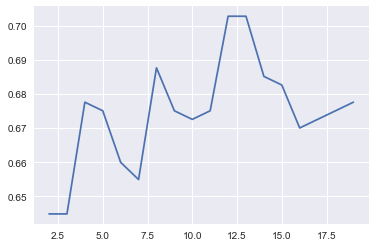

In [196]:
plt.plot(k,[s[1] for s in  gs.grid_scores_],)

In [190]:
gs.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [191]:
print gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')


In [192]:
gs.best_score_

0.7027707808564232

In [177]:
cm = metrics.confusion_matrix(Y, gs.predict(X))
print cm

[[264   7]
 [110  16]]


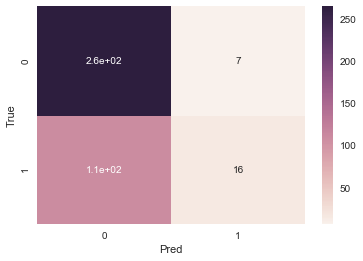

In [178]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

# Building a Classification Model

#### since our problem statement is to predict an admit trying out a classification model might help! 

_ Creating dummy variables _

In [179]:
adm_df2 = adm_df.join(pd.get_dummies(adm_df['prestige'], prefix='prestige'))
adm_df2.drop(['prestige','prestige_1.0'], axis=1)

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1
5,1,760.0,3.00,1,0,0
6,1,560.0,2.98,0,0,0
7,0,400.0,3.08,1,0,0
8,1,540.0,3.39,0,1,0
9,0,700.0,3.92,1,0,0


In [180]:
X2 = adm_df2.drop(['admit'], axis=1)
Y2 = adm_df2['admit']

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [182]:
sc = StandardScaler()
scaled_feature = sc.fit_transform(X2)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X2), n_folds=10),
    scoring='roc_auc'
)

gs.fit(X2, Y2)
gs.grid_scores_

/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.67520, std: 0.09669, params: {'C': 1, 'class_weight': None},
 mean: 0.67738, std: 0.09760, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.67777, std: 0.09574, params: {'C': 2, 'class_weight': None},
 mean: 0.67427, std: 0.09242, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.67526, std: 0.09535, params: {'C': 3, 'class_weight': None},
 mean: 0.67430, std: 0.09251, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.67373, std: 0.09492, params: {'C': 4, 'class_weight': None},
 mean: 0.67528, std: 0.09296, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.67619, std: 0.09356, params: {'C': 5, 'class_weight': None},
 mean: 0.67560, std: 0.09136, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.67569, std: 0.09159, params: {'C': 6, 'class_weight': None},
 mean: 0.67534, std: 0.09181, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.67576, std: 0.09053, params: {'C': 7, 'class_weight': None},
 mean: 0.67409, std: 0.09120, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [183]:
gs.best_score_

0.6777710713506645

In [184]:
cm = metrics.confusion_matrix(Y2, gs.predict(X2))
print cm

[[253  18]
 [ 98  28]]


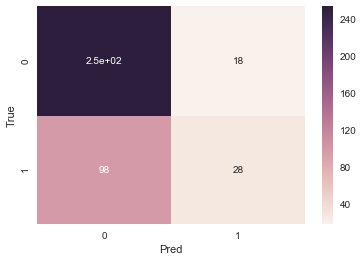

In [185]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

In [186]:
from sklearn.metrics import classification_report

In [187]:
print classification_report(Y2, gs.predict(X2))

             precision    recall  f1-score   support

          0       0.72      0.93      0.81       271
          1       0.61      0.22      0.33       126

avg / total       0.69      0.71      0.66       397

